# Problem Statement

Predict the salary if the employee using the features provided in the data.

Downlaod Files: https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read data from CSV file
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


# Here the Salary is our target/label and rest of the columns are features.

In [3]:
#To analyse the data I am going apply describe method
data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


# There is no null value present in our data set. Now will check for outliers and remove them if any present in the dataset

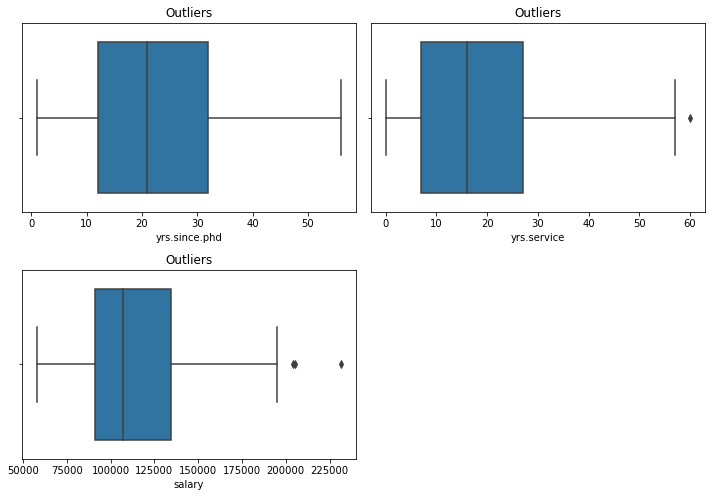

In [4]:
#Will separate string data from numeric data to check outliers.
box_data = data.drop(columns = ['rank','discipline','sex'])

#Will implement boxplot check outliers
plt.figure(figsize = (10,10))
plotnumber = 1

for column in box_data:
    if plotnumber <= 3:
        plt.subplot(3,2,plotnumber)
        sns.boxplot(box_data[column])
        plt.xlabel(column)
        plt.title('Outliers')
    
    plotnumber += 1
    
plt.tight_layout()  

# We have outliers in yrs.service and salary we will identify them using Inter Quantile Range Method and remove.

In [5]:
#Remove outliers for yrs.service
def remove_outliers_years_service(data):
    IQR = data['yrs.service'].quantile(0.75) - data['yrs.service'].quantile(0.25)
    
    higher_range = data['yrs.service'].quantile(0.75) + (1.5 * IQR)
    
    data.loc[data['yrs.service'] >= higher_range, 'yrs.service'] = higher_range    

In [6]:
remove_outliers_years_service(data)

In [7]:
#Remove outliers for salary
def remove_outliers_salary(data):
    IQR = data['salary'].quantile(0.75) - data['salary'].quantile(0.25)
    
    higher_range = data['salary'].quantile(0.75) + (1.5 * IQR)
    
    data.loc[data['salary'] >= higher_range, 'salary'] = higher_range  

In [8]:
remove_outliers_salary(data)

# Now I will plot the same box plot again and check if outliers have been removed.

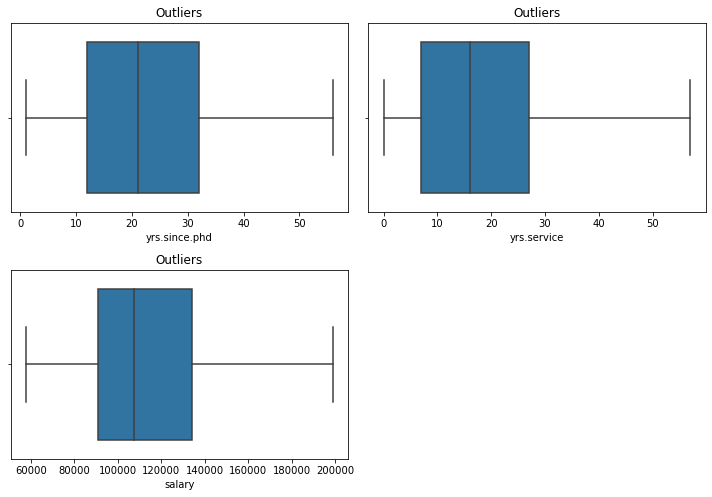

In [9]:
#Will separate string data from numeric data to check outliers.
box_data = data.drop(columns = ['rank','discipline','sex'])

#Will implement boxplot check outliers
plt.figure(figsize = (10,10))
plotnumber = 1

for column in box_data:
    if plotnumber <= 3:
        plt.subplot(3,2,plotnumber)
        sns.boxplot(box_data[column])
        plt.xlabel(column)
        plt.title('Outliers')
    
    plotnumber += 1
    
plt.tight_layout()

# Outliers have been removed completely now will apply Feature Engineering method to change our string data to numeric data so model can read it.

In [10]:
def feature_engineering(data):
    #Convert the rank column into 0 and 1, if prof 1 else 0
    data['rank'] = np.where(data['rank'] == 'Prof', 1, 0)
    
    #Convert the discipline column into 0 and 1, if A 1 else 0
    data['discipline'] = np.where(data['discipline'] == 'A', 1, 0)
    
    #Convert the sex column into 0 and 1, if Male 1 else 0
    data['sex'] = np.where(data['sex'] == 'Male', 1, 0)
    return data

In [11]:
data = feature_engineering(data)

In [12]:
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,0,19,18,1,139750.0
1,1,0,20,16,1,173200.0
2,0,0,4,3,1,79750.0
3,1,0,45,39,1,115000.0
4,1,0,40,41,1,141500.0
...,...,...,...,...,...,...
392,1,1,33,30,1,103106.0
393,1,1,31,19,1,150564.0
394,1,1,42,25,1,101738.0
395,1,1,25,15,1,95329.0


# Data have been featured successfully and now all the columns are in numerical value.


In [13]:
data.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,0.670025,0.455919,22.314861,17.607053,0.901763,113595.230479
std,0.470797,0.498682,12.887003,12.982185,0.298010,29925.691181
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,0.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,1.000000,0.000000,21.000000,16.000000,1.000000,107300.000000
75%,1.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,1.000000,1.000000,56.000000,57.000000,1.000000,198962.500000


# In yrs.service column min value is showing 0 and max 57 which can't be true. I will apply mean method to deal with min and as per my research a Professors average service time would be between 25 to 35 years. Hence I will remove the data which has yrs.service over 35 years.

In [14]:
#Handling min = 0 by applying mean method .
data['yrs.service'] = data['yrs.service'].replace(0,data['yrs.service'].mean())

In [15]:
#Will look for the index's which has values over 35 years in service column
yrs_service = np.where(data['yrs.service'] > 35)
yrs_service = list(yrs_service)
print(yrs_service)

[array([  3,   4,   7,  19,  43,  69,  71,  86,  93, 113, 117, 125, 131,
       194, 201, 211, 229, 238, 242, 250, 261, 266, 268, 270, 276, 279,
       280, 282, 283, 285, 295, 298, 299, 300, 304, 317, 327, 330, 335,
       342, 350, 351, 356, 364, 365, 378, 383, 388], dtype=int64)]


In [16]:
#Will drop those index which has values over 40 years
data = data.drop(data.index[yrs_service])

In [17]:
data.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,0.633238,0.432665,19.472779,14.830022,0.891117,112781.537249
std,0.482613,0.496157,10.841464,9.448086,0.311939,28997.305096
min,0.000000,0.000000,1.000000,1.000000,0.000000,62884.000000
25%,0.000000,0.000000,11.000000,7.000000,1.000000,91000.000000
50%,1.000000,0.000000,19.000000,15.000000,1.000000,107008.000000
75%,1.000000,1.000000,28.000000,22.000000,1.000000,132000.000000
max,1.000000,1.000000,43.000000,35.000000,1.000000,198962.500000


# Next I will implement a scatter plot to visualize the relationship between features and target.

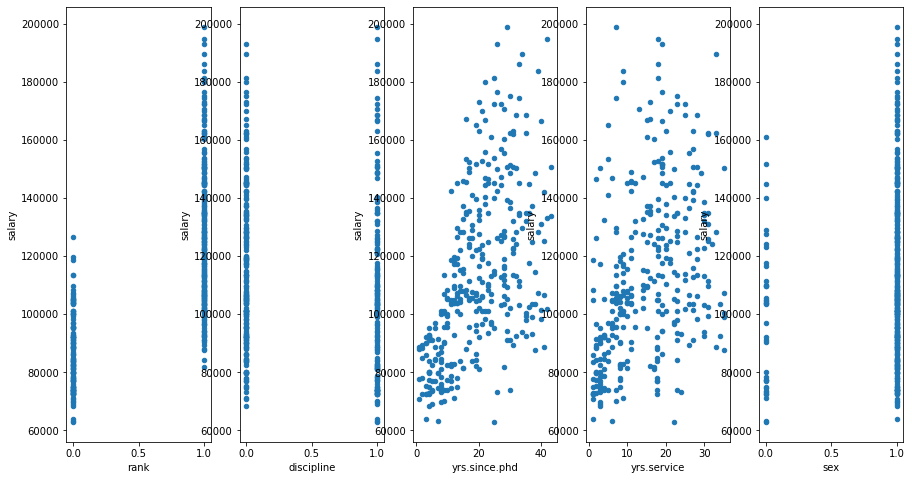

In [18]:
#Visualize the relationship between the features and the target using scatterplots.

fig, axs = plt.subplots(1,5)

data.plot(kind = 'scatter', x = 'rank', y = 'salary', ax = axs[0], figsize = (15,8))

data.plot(kind = 'scatter', x = 'discipline', y = 'salary', ax = axs[1])

data.plot(kind = 'scatter', x = 'yrs.since.phd', y = 'salary', ax = axs[2])

data.plot(kind = 'scatter', x = 'yrs.service', y = 'salary', ax = axs[3])

data.plot(kind = 'scatter', x = 'sex', y = 'salary', ax = axs[4])

fig.savefig('testdata.jpg')


# From scatter plot I have observed apart from discipline all features are related to tagert variable. Next I will use heatmap to identify correlation between features.

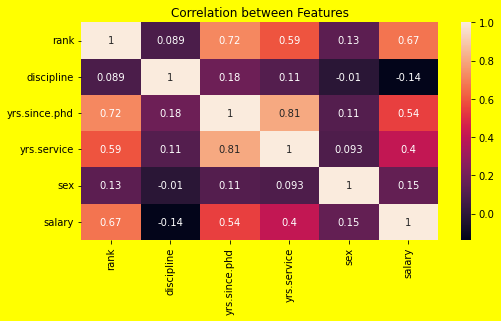

In [19]:
#Using heatmap to check correlation between features.
plt.figure(figsize=(8,4),facecolor='yellow')
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation between Features')
plt.show()

Seeing High Correlation between yrs.since.phd and yrs.service so I am going to drop one of them.

# One more time I will use scatter plot only for yrs.service and yrs.since phd to identify which column is more related to the target.

In [28]:
scatter_data = data.drop(columns = ['rank','sex','salary','discipline'])

In [29]:
target = data['salary']

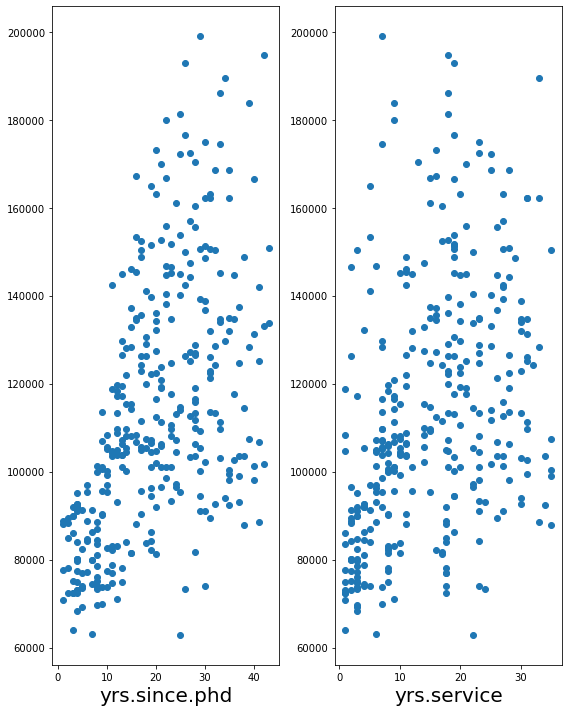

In [30]:
#Implementing scatterplot.
plt.figure(figsize = (8,10))
plotnumber = 1

for column in scatter_data:
    if plotnumber <= 2:
        ax = plt.subplot(1,2,plotnumber)
        plt.scatter(scatter_data[column],target)
        plt.xlabel(column,fontsize = 20)
        
    plotnumber += 1
    
plt.tight_layout()

# From scatter plot I have observed that yrs.since.phd is more related to the salary than yrs.service hence, I will remove yrs.service from the dataset

In [31]:
#Removing yrs.service column
data = data.drop(columns = 'yrs.service')

In [32]:
data

,rank,discipline,yrs.since.phd,sex,salary
0,1,0,19,1,139750.0
1,1,0,20,1,173200.0
2,0,0,4,1,79750.0
5,0,0,6,1,97000.0
6,1,0,30,1,175000.0
...,...,...,...,...,...
392,1,1,33,1,103106.0
393,1,1,31,1,150564.0
394,1,1,42,1,101738.0
395,1,1,25,1,95329.0


# Next I will create a distplot to visualize data distribution.

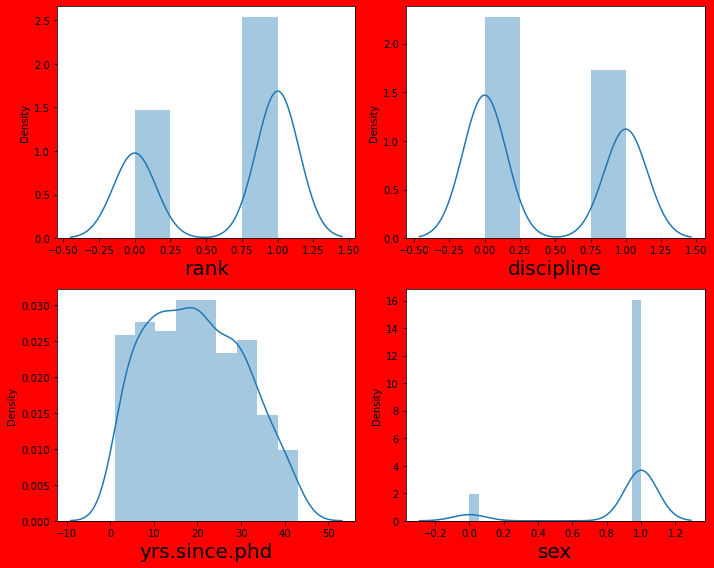

In [33]:
#Implementing distplot.
plt.figure(figsize = (10,8), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <= 4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber += 1
    
plt.tight_layout()

# Distribution looks descent enough however I will remove sex column and the diversity of male and female is imbalanced in the dataset. Next will devide the dataset into x and y variable.

In [34]:
data = data.drop(columns = ['sex'])

In [35]:
x = data.drop(columns=['salary'])
y = data['salary']

In [36]:
x

,rank,discipline,yrs.since.phd
0,1,0,19
1,1,0,20
2,0,0,4
5,0,0,6
6,1,0,30
...,...,...,...
392,1,1,33
393,1,1,31
394,1,1,42
395,1,1,25


In [37]:
y

0      139750.0
1      173200.0
2       79750.0
5       97000.0
6      175000.0
         ...   
392    103106.0
393    150564.0
394    101738.0
395     95329.0
396     81035.0
Name: salary, Length: 349, dtype: float64

# Scaling data using Standard Scaler method.

In [38]:
#Import standard scaler.
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
x_scaled = scaler.fit_transform(x)

In [41]:
#Checking scaled data
x_scaled

array([[ 0.76104239, -0.87328475, -0.04367106],
       [ 0.76104239, -0.87328475,  0.04869984],
       [-1.31398725, -0.87328475, -1.42923457],
       ...,
       [ 0.76104239,  1.14510186,  2.08085966],
       [ 0.76104239,  1.14510186,  0.51055435],
       [-1.31398725,  1.14510186, -1.05975096]])

# Now will be spliting data into train and test

In [42]:
#Import train_test_split
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 42)

In [44]:
x_train.shape

(261, 3)

In [45]:
y_train.shape

(261,)

In [46]:
x_test.shape

(88, 3)

In [47]:
y_test.shape

(88,)

# Now I will build a Machine Learning Model to predict salary.

In [48]:
#To predict salary I will use Linear Regrassion model.
from sklearn.linear_model import LinearRegression

In [49]:
lr = LinearRegression()

In [50]:
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
y_pred = lr.predict(x_test)

# Will check how well LR model fits the data.

In [52]:
#Will import R2 metric.
from sklearn.metrics import r2_score

In [53]:
#Print the R2 value of the model
r2_score(y_test,y_pred)

0.42890207142251036

In [54]:
#Let's check how well model fits on train data

#Adjusted R2 score
lr.score(x_train,y_train)

0.5238619393184559

In [78]:
#Let's check how well model fits on test data

#Adjusted R2 score

lr.score(x_test,y_test)

0.4596097958504102

In [56]:
data_frame = pd.DataFrame({'Actual Salary':y_test,'Predicted Salary':y_pred})
data_frame

,Actual Salary,Predicted Salary
170,91227.0,89183.620617
389,186023.0,125237.556108
358,109954.0,122269.030529
254,116450.0,122269.030529
168,101210.0,90964.735964
...,...,...
110,112429.0,117519.389604
292,183800.0,128799.786802
65,100522.0,91558.441079
394,101738.0,130580.902149
